In [53]:
import random
import numpy as np
from PIL import Image
import requests
from io import BytesIO
from requests.models import parse_header_links
import matplotlib.pyplot as plt
import urllib.request
from scipy.spatial import KDTree
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [54]:
names = pd.read_csv("./clase.txt")

dataset_tissue = pd.read_csv("./dataset_tissue.txt", skiprows=1, header=None).drop(0, axis=1).transpose()
#dataset.insert(dataset.shape[1], "tejido", names.x.values)

print(names.x.values)
# X = dataset.values
# Y = names.x.values

['kidney' 'kidney' 'kidney' 'kidney' 'kidney' 'kidney' 'kidney' 'kidney'
 'kidney' 'kidney' 'kidney' 'kidney' 'kidney' 'kidney' 'kidney' 'kidney'
 'hippocampus' 'hippocampus' 'hippocampus' 'hippocampus' 'hippocampus'
 'hippocampus' 'hippocampus' 'hippocampus' 'hippocampus' 'hippocampus'
 'hippocampus' 'hippocampus' 'hippocampus' 'hippocampus' 'hippocampus'
 'hippocampus' 'hippocampus' 'hippocampus' 'hippocampus' 'hippocampus'
 'hippocampus' 'hippocampus' 'hippocampus' 'hippocampus' 'hippocampus'
 'hippocampus' 'hippocampus' 'hippocampus' 'hippocampus' 'hippocampus'
 'cerebellum' 'cerebellum' 'cerebellum' 'cerebellum' 'cerebellum'
 'cerebellum' 'cerebellum' 'cerebellum' 'cerebellum' 'cerebellum'
 'cerebellum' 'cerebellum' 'cerebellum' 'cerebellum' 'cerebellum'
 'cerebellum' 'cerebellum' 'cerebellum' 'cerebellum' 'cerebellum'
 'cerebellum' 'cerebellum' 'cerebellum' 'cerebellum' 'cerebellum'
 'cerebellum' 'cerebellum' 'kidney' 'kidney' 'kidney' 'kidney' 'kidney'
 'kidney' 'kidney' 'kidney

In [55]:
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(dataset_tissue)

pca = PCA(n_components=66)
principal_components = pca.fit_transform(dataset_tissue)

df_pca = pd.DataFrame(data=principal_components, columns=[f"PC{i+1}" for i in range(66)])
dataset = df_pca.to_numpy()

In [56]:
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66
0,-33.367637,-27.601399,50.926062,4.524792,21.690513,-5.230300,-22.937717,-6.096537,-17.680577,-14.793034,...,-3.075138,1.952748,-3.808385,3.826896,1.218813,-1.146815,-1.965140,-1.128201,2.790746,3.864659
1,-41.483103,-36.991284,36.456874,-1.047351,10.531343,-0.733704,-4.642888,32.009156,-1.333350,-16.575682,...,7.591968,1.850878,-1.892325,-2.022161,-3.835147,-2.886027,7.931060,-2.592784,0.555464,-3.271797
2,-41.323114,3.803541,36.129114,0.546659,48.144536,0.656995,-38.721731,-28.889944,2.339968,-17.588176,...,-0.457801,-0.554167,1.400268,-1.737826,2.363992,0.564279,4.320445,-1.552808,-2.150107,1.212604
3,-40.054572,-9.754504,32.010383,4.963027,37.266098,11.035631,-5.414538,38.984445,1.820458,-3.279857,...,0.650646,-1.154664,-0.694781,-3.678039,1.997942,0.252330,3.310779,0.389991,-3.994119,-0.897295
4,-36.146505,-19.703781,44.331295,6.833245,27.495327,6.149118,-11.545230,43.562259,-4.060760,-1.057173,...,2.316674,0.275198,-1.250219,-6.861348,1.683627,-3.659770,3.001644,-1.539549,-3.540777,0.729203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,-24.929772,-51.726650,6.589041,-20.229914,-57.532339,80.026494,-40.600963,-7.101832,-14.195744,34.539439,...,-1.283133,1.810641,0.905504,-1.749155,0.138214,4.258343,5.263352,-1.725951,1.047294,2.162243
185,-39.673293,-44.627058,-10.258163,-18.879989,-49.299946,91.763879,-29.933048,-5.855495,0.393451,15.983644,...,2.937237,-2.694593,2.478551,0.256186,1.304263,-8.954754,-5.019153,1.013733,-1.510102,-1.806702
186,-43.963308,-36.273002,-11.021322,-17.870209,-48.886832,99.183170,-33.299932,-1.116368,-2.241261,-11.830169,...,1.985991,-1.379901,-5.415400,1.764685,5.119300,-3.635000,-6.018734,3.257387,3.359994,-6.121538
187,-45.484061,-24.416091,-21.337848,-15.089556,-36.526752,101.977580,-24.639077,0.599223,4.209200,-12.591223,...,-2.300699,4.952271,1.616094,1.512303,-2.315887,13.758151,2.566463,-1.723909,-1.788321,1.220004


In [57]:
class DBSCAN:
  def __init__(self, radius, min_points):
     self.radius = radius
     self.min_points = min_points
     self.cluster = 0
     self.labels = {}

  def next_cluster(self):
    self.cluster += 1
    return self.cluster

  def fit(self, dataset):
    kd_tree = KDTree(dataset)
    self.labels = {tuple(p): None for p in dataset}
    for i, point in enumerate(dataset):
      if self.labels[tuple(point)] != None:
        continue
      N = kd_tree.query_ball_point(tuple(point), self.radius, p=66.0)
      #print("N: ", len(N))
      if len(N) < self.min_points:
        self.labels[tuple(point)] = -1
        continue
      c = self.next_cluster()
      self.labels[tuple(point)] = c
      S = N.remove(i)
      S = dataset[N]
      #print("S: ", len(S))
      j = 0
      while j < len(S):
        #print("j: ", j)
        q = S[j]
        if self.labels[tuple(q)] == -1:
          self.labels[tuple(q)] = c
        if self.labels[tuple(q)] != None:
          j += 1
          continue
        N = kd_tree.query_ball_point(q, self.radius, p=66.0)
        #print("2N: ", len(N))
        self.labels[tuple(q)] = c
        if len(N) < self.min_points:
          j += 1
          continue
        #print("S: ", S)
        #print("Extend: ", np.concatenate((S, dataset[N])))
        S = np.concatenate((S, dataset[N]))
        j += 1

In [69]:
# Create and fit the DBSCAN model
dbscan = DBSCAN(radius=30, min_points=7)
dbscan.fit(dataset)

# Get cluster labels
cluster_labels = set(dbscan.labels.values())
n_clusters = len(cluster_labels) - (1 if -1 in list(cluster_labels) else 0)
n_noise = list(dbscan.labels.values()).count(-1)

print(f'Number of clusters: {n_clusters}')
print(f'Number of points with noise: {n_noise}')

Number of clusters: 7
Number of points with noise: 24


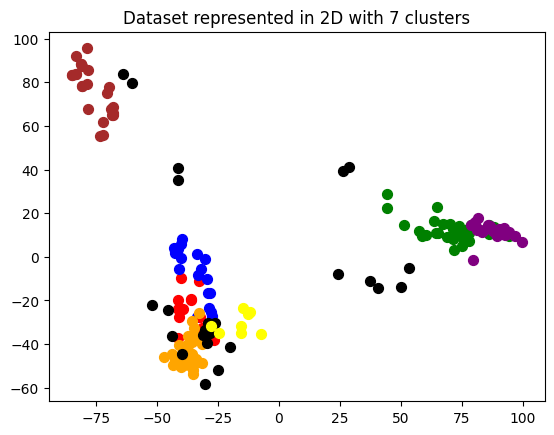

In [66]:
color_dict = {
    1: 'red',
    2: 'blue',
    3: 'green',
    4: 'purple',
    5: 'orange',
    6: 'brown',
    7: 'yellow'
}


# Plot the points with their respective colors
for point in dataset:
  color = ''
  if dbscan.labels[tuple(point)] == -1:
    color = 'black'
  else:
    color = color_dict[dbscan.labels[tuple(point)]]
  plt.scatter(point[0], point[1], c=color, label=f'Point {point}', s=50)

plt.title(f'Dataset represented in 2D with {n_clusters} clusters')

plt.show()

In [67]:
true_labels = [-1]*dataset.shape[0]
labels = [-1]*dataset.shape[0]

group_names = {
    'kidney': 1,
    'hippocampus': 2,
    'cerebellum': 3,
    'colon': 4,
    'liver': 5,
    'endometrium': 6,
    'placenta': 7
}

for i, point in enumerate(dataset):
  true_labels[i] = group_names[names.x.values[i]]
  labels[i] = dbscan.labels[tuple(point)]

In [68]:
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score


rand_index = adjusted_rand_score(true_labels, labels)
silhouette_avg = silhouette_score(dataset, labels)


print(f'Rand Index: {rand_index}')
print(f'Silhouette Value: {silhouette_avg}')

Rand Index: 0.7756777608034061
Silhouette Value: 0.3544617311887997
